# Kaggle Learn - Data Visualization

Working through lessons from https://www.kaggle.com/learn/data-visualisation

## Level 1, Part 11 - Timeseries plotting

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('default')
pd.set_option('max_rows', 9)
pd.set_option('max_columns', None)

**Dates** 
* Appear in data in different ways: 
  + Describing data aggregated over a period, each period is specified by a date
    * The period size can be changed and the data re-aggregated to observe trends different time scales
    * Pandas has an dtype for periods, **pd.Period**
  <br>
  + As a **timestamp** corresponding to a specific event
<br>
<br>

**Plotting time series** 
* A special case of interval variables and can be plotted using the same techniques
  + i.e. **df.plot.line()**<br>
  <br>
* However the plotter must understand the dtype
  + Pandas generally handles datetime objects well by default (its date-time aware)<br>
  <br>
* Grouping and aggregation is often used with time series
  + Pandas provides **df.resample** for resampleing time series
  + i.e. df.variable.resample('Y').mean()**.plot.bar()**<br>
  <br>
* Lag plots compare each data point with the previous observation separated by the lag
  + **pd.plotting.lag_plot**
  + Can identify **periodicity** for the give lag
    * If the value of the variable of interest is correlated across the lag the plot will be structured
    * Random data should not exhibit any structure in the lag plot<br>
  <br>
* Autocorrelation
  + A summary statistic of the correlation across every possible lag
    * That is, it checks every periodicity at the same time
  + **pd.plotting.autocorrelation** 
<br>
<br>

**Seaborn** for timeseries:
* As of May 2018, Seaborn has a time series plot **sns.tsplot** intended for when
  observations are nested within sampling units that were measured at multiple
  timepoints, but it is being deprecated. A "substantially altered version" is
  planned for a future release. Seems better to use Pandas or matplotlib where
  possible in the meantime.

In [91]:
# Data for example - period dates
  # read_csv parse_dates attempts to represent column as date objects
stocks = pd.read_csv('data/prices.csv', parse_dates=['date'])
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')
display(stocks.head(5))

stocks.index

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=1762, freq=None)

In [14]:
# Data for example - timestamp dates
shelter_outcomes = pd.read_csv(
    "data/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)

shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]

shelter_outcomes.head(5)

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


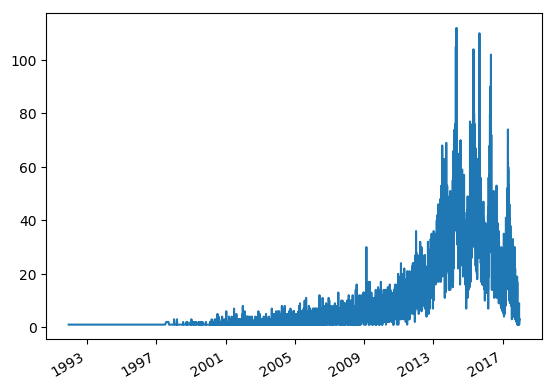

In [24]:
# Pandas - line plot - frequency by day 
shelter_outcomes['date_of_birth'].value_counts().plot.line()
plt.show()

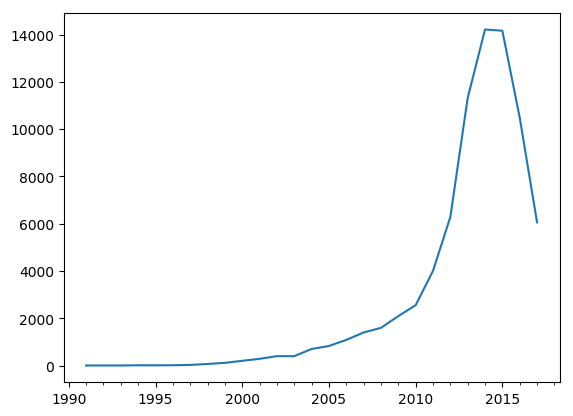

In [27]:
# Pandas - line plot - frequency by year - .resample
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()
plt.show()

In [60]:
# Playing with resample

# Enteries per year
# print(shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum())
# print()

# Number of entries on day with most enteries per year
# print(shelter_outcomes['date_of_birth'].value_counts().resample('Y').max())
# print

# Number of enteries by day in 2017
# (shelter_outcomes
#  .loc[shelter_outcomes['date_of_birth'] > '2017']
#  .date_of_birth.value_counts()
# )

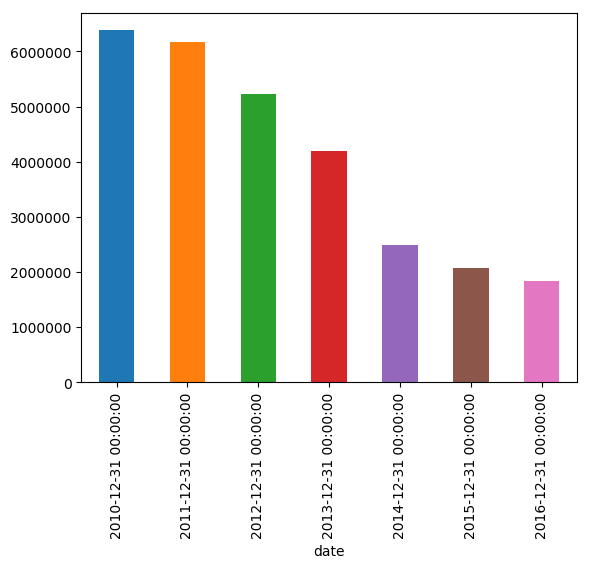

In [80]:
# Pandas - bar plot - mean by year
stocks['volume'].resample('Y').mean().plot.bar()
plt.show()

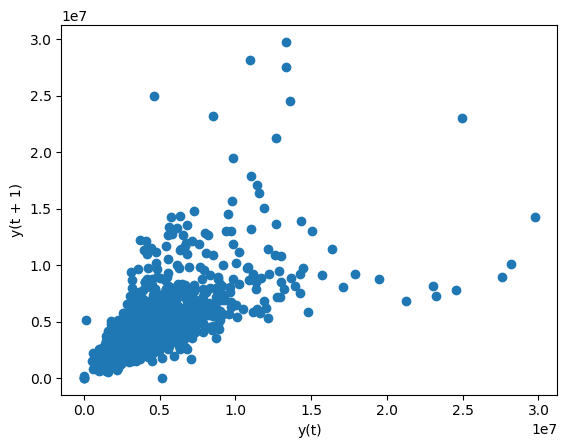

In [121]:
# Lag plot
  # Note - do not use .sample() here as it destroies time series order
pd.plotting.lag_plot(stocks['volume'])
plt.show()

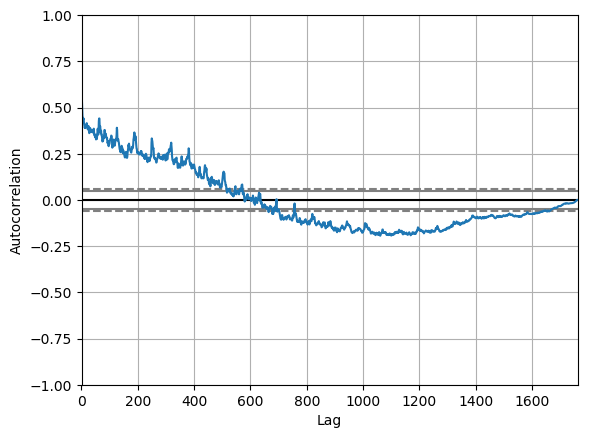

In [98]:
# Autocorrelation
pd.plotting.autocorrelation_plot(stocks['volume'])
plt.show()

#### Exercises

In [99]:
crypto = pd.read_csv("data/crypto-markets.csv")
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


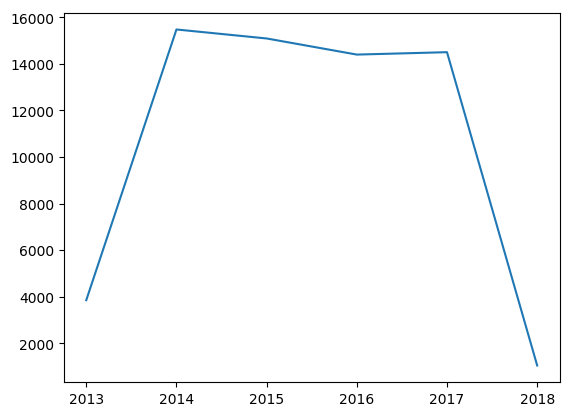

In [101]:
# Number of unique datetimes by year
shelter_outcomes['datetime'].value_counts().resample('Y').count().plot.line()

# Total number of datetimes by year
# shelter_outcomes['datetime'].value_counts().resample('Y').sum().plot.line()

plt.show()

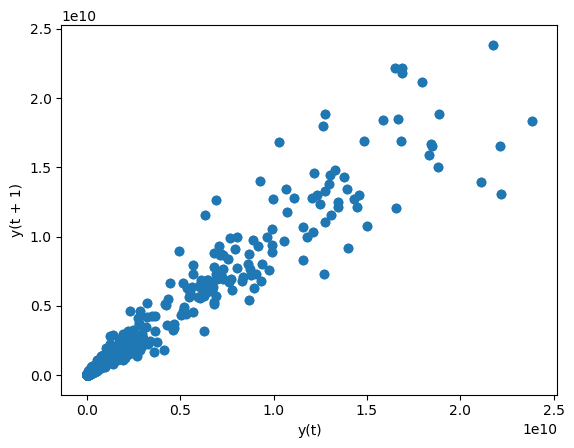

In [109]:
pd.plotting.lag_plot(crypto.volume)
plt.show()

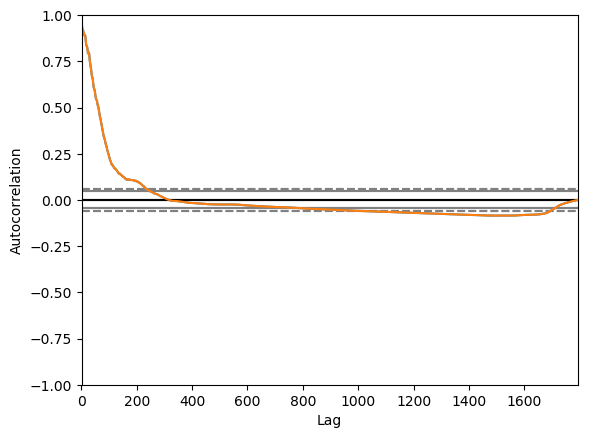

In [124]:
pd.plotting.autocorrelation_plot(crypto.volume)
plt.show()

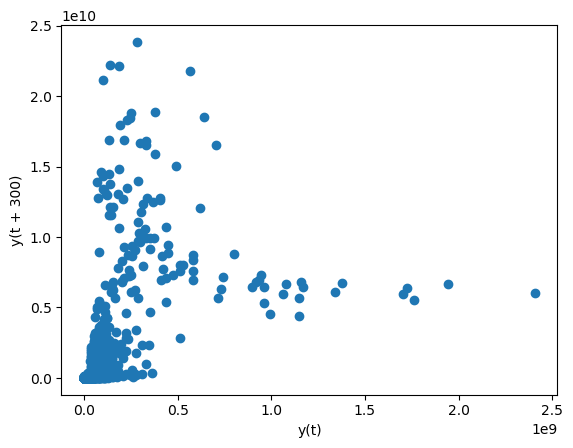

In [128]:
# Lag on time scale, where auto-correlation is approx 0
pd.plotting.lag_plot(crypto.volume, lag=300)
plt.show()